# __Financial News Sentiment Analysis__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
from transformers import pipeline
import re
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

/Users/bengrigsby/.pyenv/versions/3.12.2/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv('Phrases/Sentences_50Agree.txt', delimiter='@', header=None, encoding='ISO-8859-1')

In [3]:
data.head()

,0,1
0,"According to Gran , the company has no plans t...",neutral
1,Technopolis plans to develop in stages an area...,neutral
2,The international electronic industry company ...,negative
3,With the new production plant the company woul...,positive
4,According to the company 's updated strategy f...,positive


In [4]:
print(data.info())
print("\n")
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       4846 non-null   object
 1   1       4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB
None


0    0
1    0
dtype: int64


In [5]:
data.columns = ['text', 'sentiment']


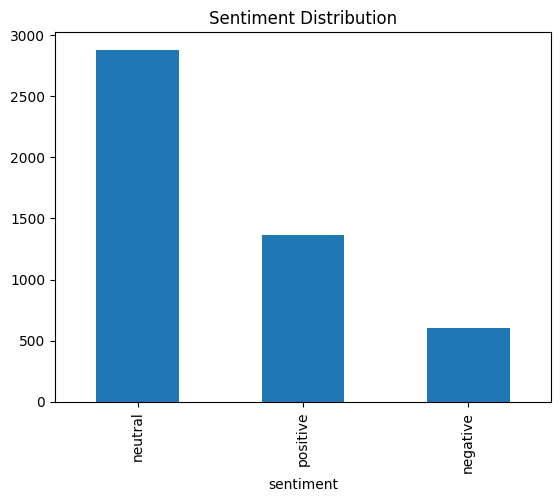

In [6]:
data['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')
plt.show()

In [7]:
stop_words = set(stopwords.words('english'))

In [8]:
def clean_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+", "", text)
    # Remove special characters, numbers, and punctuation
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Lowercase the text
    text = text.lower()
    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

In [9]:
data['clean_text'] = data['text'].apply(clean_text)

In [10]:
encoder = LabelEncoder()
data['sentiment_encoded'] = encoder.fit_transform(data['sentiment'])
print(encoder.classes_)

['negative' 'neutral' 'positive']


In [11]:
X = data['clean_text']
y = data['sentiment_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
vectorizer = TfidfVectorizer(max_features = 5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_train_tfidf = vectorizer.fit_transform(X_test)

In [13]:
print("X_train_tfidf shape:", X_train_tfidf.shape)
print("y_train shape:", y_train.shape)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train_tfidf shape: (970, 3731)
y_train shape: (3876,)
X_train shape: (3876,)
y_train shape: (3876,)


In [14]:
print("X_train shape:", len(X_train))
print("y_train shape:", len(y_train))

X_train shape: 3876
y_train shape: 3876


In [15]:
print(data['clean_text'].isnull().sum())
print(data['sentiment_encoded'].isnull().sum())

0
0


In [16]:
empty_rows = X_train[X_train.str.strip() == '']
print(f"Number of empty rows in X_train: {len(empty_rows)}")

Number of empty rows in X_train: 1


In [17]:
valid_indices = X_train[X_train.str.strip() != ''].index
X_train = X_train.loc[valid_indices]
y_train = y_train.loc[valid_indices]

In [18]:
print("X_train size:", len(X_train))
print("y_train size:", len(y_train))

X_train size: 3875
y_train size: 3875


In [19]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("X_train_tfidf shape:", X_train_tfidf.shape)
print("y_train shape:", len(y_train))

X_train_tfidf shape: (3875, 5000)
y_train shape: 3875


In [20]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [21]:
y_pred = model.predict(X_test_tfidf)

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.688659793814433


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.11      0.20       110
           1       0.69      0.96      0.81       571
           2       0.64      0.36      0.46       289

    accuracy                           0.69       970
   macro avg       0.75      0.48      0.49       970
weighted avg       0.70      0.69      0.64       970



In [24]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 12  59  39]
 [  0 551  20]
 [  1 183 105]]


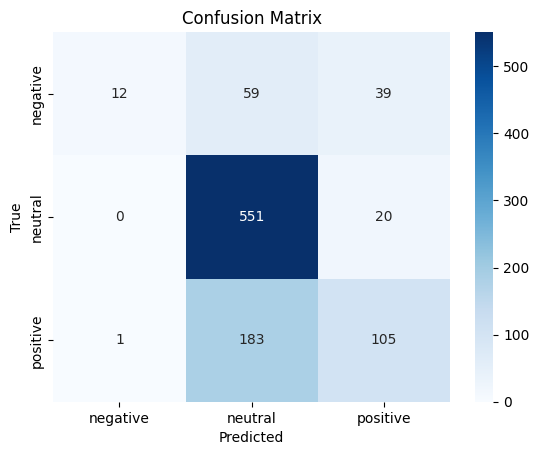

In [25]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [26]:
log_model = LogisticRegression()
log_model.fit(X_train_tfidf, y_train)
y_pred_log = log_model.predict(X_test_tfidf)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.7515463917525773
              precision    recall  f1-score   support

           0       0.81      0.44      0.57       110
           1       0.73      0.96      0.83       571
           2       0.81      0.46      0.59       289

    accuracy                           0.75       970
   macro avg       0.78      0.62      0.66       970
weighted avg       0.76      0.75      0.73       970



In [27]:
base_models = [
    ('naive_bayes', MultinomialNB()),
    ('logistic_regression', LogisticRegression(max_iter=500)),
    ('svm', SVC(probability=True))
]

In [28]:
meta_model = LogisticRegression(max_iter=500)

In [29]:
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

In [30]:
stacking_model.fit(X_train_tfidf, y_train)

StackingClassifier(estimators=[('naive_bayes', MultinomialNB()),
                               ('logistic_regression',
                                LogisticRegression(max_iter=500)),
                               ('svm', SVC(probability=True))],
                   final_estimator=LogisticRegression(max_iter=500))

In [31]:
# Make predictions
y_pred_stack = stacking_model.predict(X_test_tfidf)

# Evaluate the performance
print("Stacking Model Accuracy:", accuracy_score(y_test, y_pred_stack))
print(classification_report(y_test, y_pred_stack))

Stacking Model Accuracy: 0.7670103092783506
              precision    recall  f1-score   support

           0       0.71      0.54      0.61       110
           1       0.78      0.92      0.84       571
           2       0.76      0.54      0.63       289

    accuracy                           0.77       970
   macro avg       0.75      0.67      0.70       970
weighted avg       0.76      0.77      0.75       970



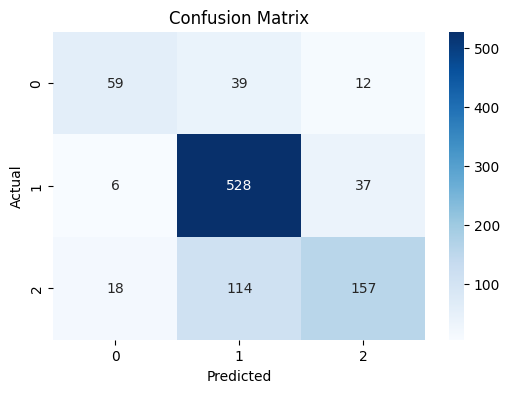

In [32]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_stack), annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()